<a href="https://colab.research.google.com/github/rkrissada/100DayOfMLCode/blob/master/day_046_autoencode_image_reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
from keras.models import Model
from imgaug import augmenters
from random import randint
import pandas as pd
import numpy as np
%matplotlib inline

from keras.datasets import fashion_mnist
((x_train, y_train), (x_test, y_test)) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 2s 0us/step


Autoencoders are a special type of neural network architectures in which the output is same as the input. Autoencoders are trained in an unsupervised manner in order to learn the exteremely low level repersentations of the input data. These low level features are then deformed back to project the actual data. An autoencoder is a regression task where the network is asked to predict its input (in other words, model the identity function). These networks has a tight bottleneck of a few neurons in the middle, forcing them to create effective representations that compress the input into a low-dimensional code that can be used by the decoder to reproduce the original input.

A typical autoencoder architecture comprises of three main components:

**Encoding Architecture :** The encoder architecture comprises of series of layers with decreasing number of nodes and ultimately reduces to a latent view repersentation.

**Latent View Repersentation :** Latent view repersents the lowest level space in which the inputs are reduced and information is preserved.

**Decoding Architecture :** The decoding architecture is the mirro image of the encoding architecture but in which number of nodes in every layer increases and ultimately outputs the similar (almost) input.

In [0]:
## normalize and reshape the predictors  
x_train = x_train/255

In [0]:
## create train and validation datasets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3)

## reshape the inputs
x_train = x_train.reshape(-1, 784)
x_val = x_val.reshape(-1, 784)

#### Create Autoencoder architecture

lets create an autoencoder architecture. The encoding part comprises of three layers with 1500, 1000, and 500 nodes. Encoding architecture is connected to latent view space comprising of 10 nodes which is then connected to decoding architecture with 500, 1000, and 1500 nodes. The final layer comprises of exact number of nodes as the input layer.

In [4]:
## input layer
input_layer = Input(shape=(784,))

## encoding architecture
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)

## latent view
latent_view   = Dense(10, activation='sigmoid')(encode_layer3)

## decoding architecture
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)

## output layer
output_layer  = Dense(784)(decode_layer3)

model = Model(input_layer, output_layer)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1500)              1177500   
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1501000   
_________________________________________________________________
dense_3 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5010      
_________________________________________________________________
dense_5 (Dense)              (None, 500)               5500      
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              501000    
__________

In [6]:
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(x_train, x_train, epochs=20, batch_size=2048, validation_data=(x_val, x_val), callbacks=[early_stopping])

Instructions for updating:
Use tf.cast instead.
Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 5s 112us/step - loss: 0.0996 - val_loss: 0.0700
Epoch 2/20
42000/42000 [==============================] - 2s 40us/step - loss: 0.0660 - val_loss: 0.0625
Epoch 3/20
42000/42000 [==============================] - 2s 40us/step - loss: 0.0558 - val_loss: 0.0489
Epoch 4/20
42000/42000 [==============================] - 2s 40us/step - loss: 0.0448 - val_loss: 0.0416
Epoch 5/20
42000/42000 [==============================] - 2s 40us/step - loss: 0.0395 - val_loss: 0.0376
Epoch 6/20
42000/42000 [==============================] - 2s 40us/step - loss: 0.0370 - val_loss: 0.0360
Epoch 7/20
42000/42000 [==============================] - 2s 40us/step - loss: 0.0354 - val_loss: 0.0355
Epoch 8/20
42000/42000 [==============================] - 2s 40us/step - loss: 0.0328 - val_loss: 0.0313
Epoch 9/20
42000/42000 [==============================] - 2s 

Generate the predictions on validation data.

In [0]:
preds = model.predict(x_val)

#### Inputs: Actual Images

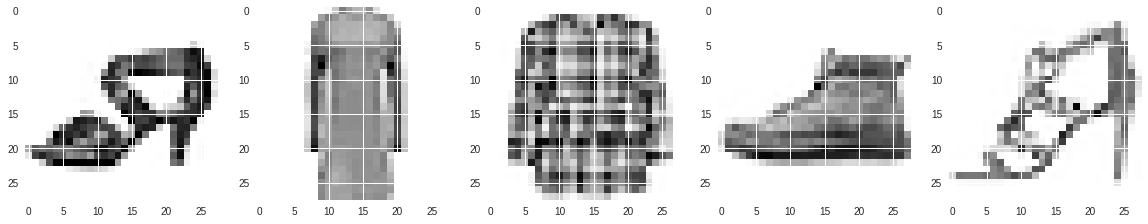

In [10]:
from PIL import Image 
f, ax = plt.subplots(1,5)
f.set_size_inches(20, 10)
for i in range(5):
    ax[i].imshow(x_val[i].reshape(28, 28))
plt.show()

#### Predicted : Autoencoder Output

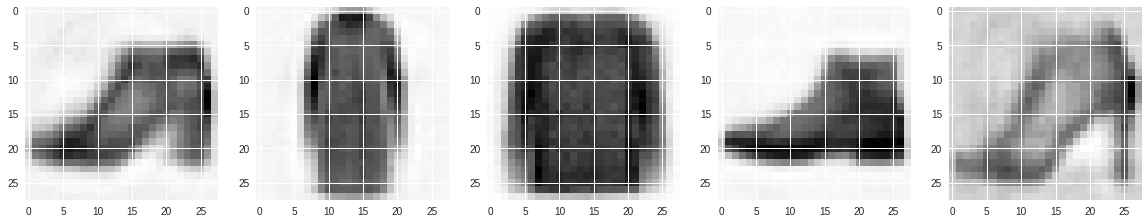

In [11]:
f, ax = plt.subplots(1,5)
f.set_size_inches(20, 10)
for i in range(5):
    ax[i].imshow(preds[i].reshape(28, 28))
plt.show()

So we can see that an autoencoder trained with 20 epoochs is able to reconstruct the input images very well. Lets look at other use-case of autoencoders - Image denoising or removal of noise from the image.